# Numerical Methods in Economics: Chapter 4
<table align="left">
    <tr align="left"><th>Topics:</th></tr>
    <tr><td><a href = "#OneDimensionalMinimization">One-Dimensional Minimization</a></td></tr>
</table>

The general problem that we are trying to answer is how to minimize a given function subject to a set equality and inequality constraints:
$$
\begin{align}
\min_{x}\;&f(x) \\ 
\text{s.t. }&g_i(x) = 0, \; i = 1...n \\
&h_j(x) \leq 0, \; j = 1...n
\end{align}
$$
where, $f:\; \mathbb{R}^{n}\rightarrow\mathbb{R}$ is our objective Function,the functions $g_i(x):\mathbb{R}^{n}\rightarrow\mathbb{R}$ are our equality constraints, and the $h_j(x):\mathbb{R}^{n}\rightarrow\mathbb{R}$ are our inequality constraints. An example of this sort of problem would be maximizing utility with bugdet constraints, or optimizing the <a href = https://www.investopedia.com/terms/s/sharperatio.asp>sharpe ratio</a> of a portfolio of assets subject to constraints on the weights of our assets. 

This Notebook will first examine and impliment various algorithms used in solving these problems. We will start with comparison methods, which require very little constraints on the functions we are optiming, but come at the cost of relatively slower convergence. We will then move to Gradient methods which differentiability of our objective and constraints. Finally we will look at methods that utilize curvature information, which while generaly converging the fastest of our three methods, will usually have the highest computational and memory costs.   

### <a id = "OneDimensionalMinimization">One-Dimensional Minimization </a> 

The first optimization we will deal with is the scalar unconstrained problem given by $\min_{x}f(x)$, where $f: \mathbb{R}\rightarrow \mathbb{R}$. We start with this type of problem as to develop intuition into the methods in a cleara fasion. Furthermore, these methods later become the ingridients to larger multivariate algorithms.

<h3><a href = https://en.wikipedia.org/wiki/Bisection_method>The Bisection or Bracketing Method</a></h3>

Suppose that we have a function, f, an that we have found points $a$, $b$, and $c$, such that $a<b<c$, and that $f(a), f(c) > f(b)$. Then this implies that somewhere in the region of $[a, c]$ there is a local minimum. We then want to find a smaller interval, say $[d, c]$ that also contains this local minimum. This new point $d$, will be in the region $(a, c)$. First, let us consider the case where $d \in (a,b]$, then if $f(d) > f(b)$, we know that the minimum must be in the region $[d, c]$. Likewise, if $f(d) < f(b)$, we know that the minimum must be in the region $[a, b]$. We would do this same process for a point $d \in [b, c)$. If we were to repeat this process, finding smaller and smaller regions in which some minimum may lie.

Let us try and visualize this algorithm:

In [237]:
# First let us impliment a simple version of the algorithm. The below is an abbreviated version of the 
# code found in the file optimization.py. Note that we have excluded the doc string and type annotations.
def one_iteration_bracketing(f, a, b, c): 
    # First select our new point as either the mid point between (a, b) or (b, c)
    if b-a < c-b :
        d = (b + c) / 2
    else: 
        d = (a + b) / 2
    
    # Compute the value at the new point d. 
    f_d = f(d)
    
    # Finally select the new triple to return.
    if d < b:
        if f(b) < f(d):
            return (d, b, c)
        else:
            return (a, d, b)
    else:
        if f(b) < f(d):
            return (a, b, d)
        else:
            return (b, d, c)
        
def bracketing(f, triple, n_iter = 100, eps = 0): 
    # Simply call iterations of the function untill one of the conditions are reached.
    # Initialize the number of iterations to 0, and the error to 100.
    n = 0; 
    
    while n < n_iter:
        triple = one_iteration_bracketing(f, *triple)
        if triple[2] - triple[0] < eps:
            break
        n += 1
        
    return triple

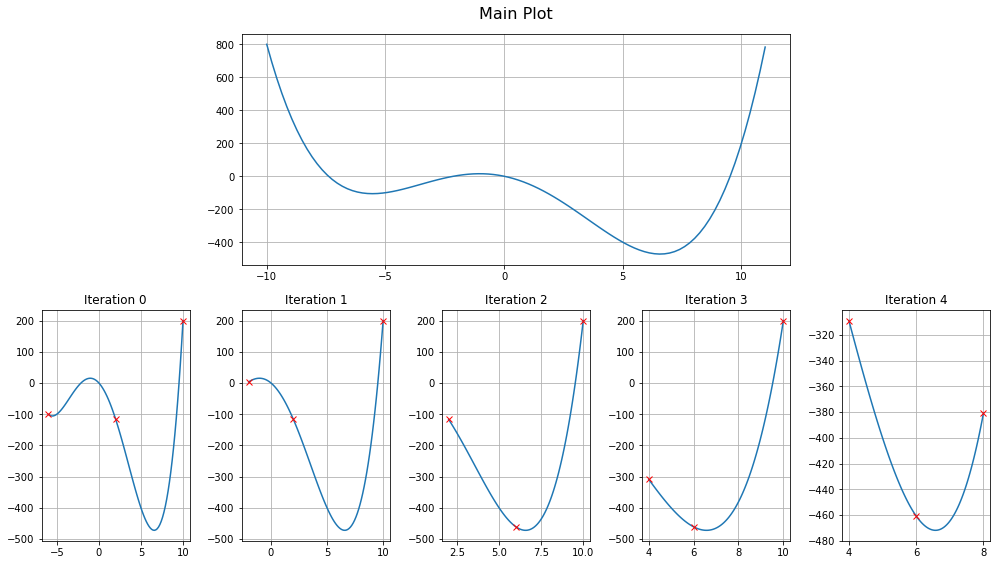

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Let us define an arbitray polynomial function. 
def poly(x: float) -> float:
    return x**4 / 5 - 15*x**2 - 30*x

poly_vec = np.vectorize(poly)

# Create a simple graph of our function
x = np.linspace(-10, 11, 100)
y = poly_vec(x)

# Create Grid to visualize our function and ther first three iterations.
fig_1 = plt.figure(figsize = (14, 8))
grid_1 = fig_1.add_gridspec(2, 5, width_ratios = [1, 1, 1, 1, 1])

main = fig_1.add_subplot(grid_1[0, 1:4])
main.plot(x, y)
main.set_title(r"Main Plot",
               pad = 15, fontdict = dict(fontsize = 16))
plt.grid()

# Graph three iterations of the function.
start = (-6, 2, 10)

for i in range(5):
    x = np.linspace(start[0], start[2], 100); y = poly_vec(x)
    iter_i = fig_1.add_subplot(grid_1[1, i:i+1])
    iter_i.plot(x,y)
    iter_i.plot(start, poly_vec(start), "rx")
    plt.grid(); iter_i.set_title(f"Iteration {i}")
    start = one_iteration_bracketing(poly, *start)
    
plt.tight_layout(pad = 1.25)
plt.show()

The function we chose has two local minima, one at